##  Obesity Dataset

##### Importing Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



##### Loading the dataset and checking for null values

In [37]:
df = pd.read_csv("Obesity.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [38]:
new_column_names = {
    "Gender": "Gender",
    "Age": "Age",
    "Height": "Height",
    "Weight": "Weight",
    "family_history_with_overweight": "Family_History_with_overweight",
    "FAVC": "High_Calorie_Food_Consumption",
    "FCVC": "Veggie_Intake",
    "NCP": "Meals_per_Day",
    "CAEC": "Snacking_Frequency",
    "SMOKE": "Smoking_Habit",
    "CH2O": "Daily_Water_Intake(in L)",
    "SCC": "Monitors_Calories",
    "FAF": "Physical_Activity_frequency",
    "TUE": "Technology_Use(in hrs)",
    "CALC": "Alcohol_Consumption",
    "MTRANS": "Transport_Mode",
    "NObeyesdad": "Obesity_Level"
}

df.rename(columns=new_column_names, inplace=True)

print(df.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'Family_History_with_overweight',
       'High_Calorie_Food_Consumption', 'Veggie_Intake', 'Meals_per_Day',
       'Snacking_Frequency', 'Smoking_Habit', 'Daily_Water_Intake(in L)',
       'Monitors_Calories', 'Physical_Activity_frequency',
       'Technology_Use(in hrs)', 'Alcohol_Consumption', 'Transport_Mode',
       'Obesity_Level'],
      dtype='object')


In [39]:
null_values = df.isnull().sum()
print(null_values)
df.isnull().values.any()

Gender                            0
Age                               0
Height                            0
Weight                            0
Family_History_with_overweight    0
High_Calorie_Food_Consumption     0
Veggie_Intake                     0
Meals_per_Day                     0
Snacking_Frequency                0
Smoking_Habit                     0
Daily_Water_Intake(in L)          0
Monitors_Calories                 0
Physical_Activity_frequency       0
Technology_Use(in hrs)            0
Alcohol_Consumption               0
Transport_Mode                    0
Obesity_Level                     0
dtype: int64


False

##### Preprocessing of the Dataset

In [40]:
print(df.dtypes) 

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
Family_History_with_overweight     object
High_Calorie_Food_Consumption      object
Veggie_Intake                     float64
Meals_per_Day                     float64
Snacking_Frequency                 object
Smoking_Habit                      object
Daily_Water_Intake(in L)          float64
Monitors_Calories                  object
Physical_Activity_frequency       float64
Technology_Use(in hrs)            float64
Alcohol_Consumption                object
Transport_Mode                     object
Obesity_Level                      object
dtype: object


##### Checking for outliers

In [41]:
outlier_summary = {}

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Convert outlier summary to a DataFrame for better display
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=["Outlier Count"])
print("\nOutliers detected (IQR method):")
print(outlier_df.sort_values(by="Outlier Count", ascending=True))


Outliers detected (IQR method):
                             Outlier Count
Veggie_Intake                            0
Daily_Water_Intake(in L)                 0
Physical_Activity_frequency              0
Technology_Use(in hrs)                   0
Height                                   1
Weight                                   1
Age                                    168
Meals_per_Day                          579


##### Checking for unique values

In [42]:
unique_col=df.select_dtypes(include=['object'])
for col in unique_col:
    print(col, df[col].nunique(), "\n Unique values are ", df[col].unique(),"\n")

Gender 2 
 Unique values are  ['Female' 'Male'] 

Family_History_with_overweight 2 
 Unique values are  ['yes' 'no'] 

High_Calorie_Food_Consumption 2 
 Unique values are  ['no' 'yes'] 

Snacking_Frequency 4 
 Unique values are  ['Sometimes' 'Frequently' 'Always' 'no'] 

Smoking_Habit 2 
 Unique values are  ['no' 'yes'] 

Monitors_Calories 2 
 Unique values are  ['no' 'yes'] 

Alcohol_Consumption 4 
 Unique values are  ['no' 'Sometimes' 'Frequently' 'Always'] 

Transport_Mode 5 
 Unique values are  ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] 

Obesity_Level 7 
 Unique values are  ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] 



#### Exploratory data analysis for obesity dataset

##### Distribution of Obesity levels

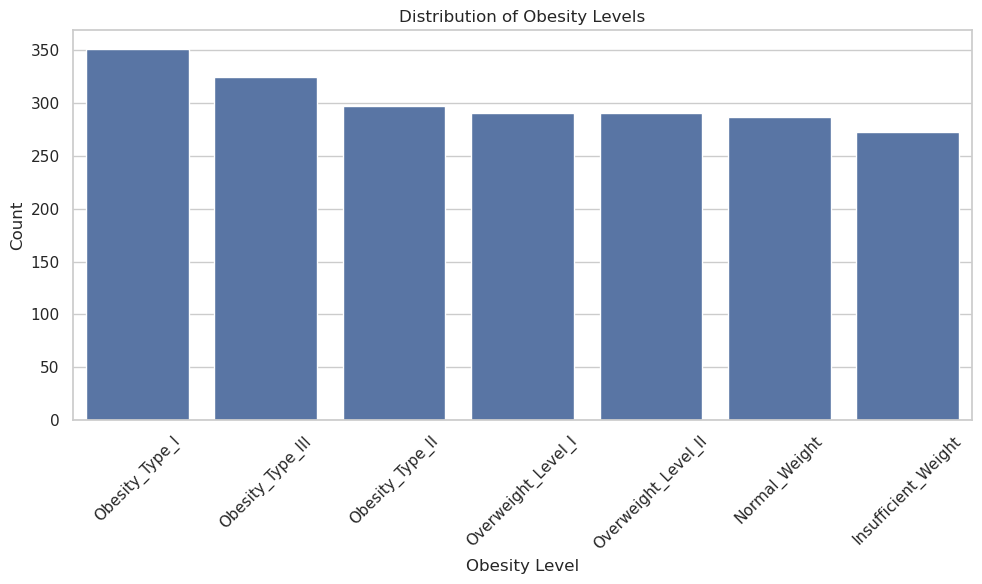

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Obesity_Level', order=df['Obesity_Level'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### Gender Distribution Across Obesity Levels

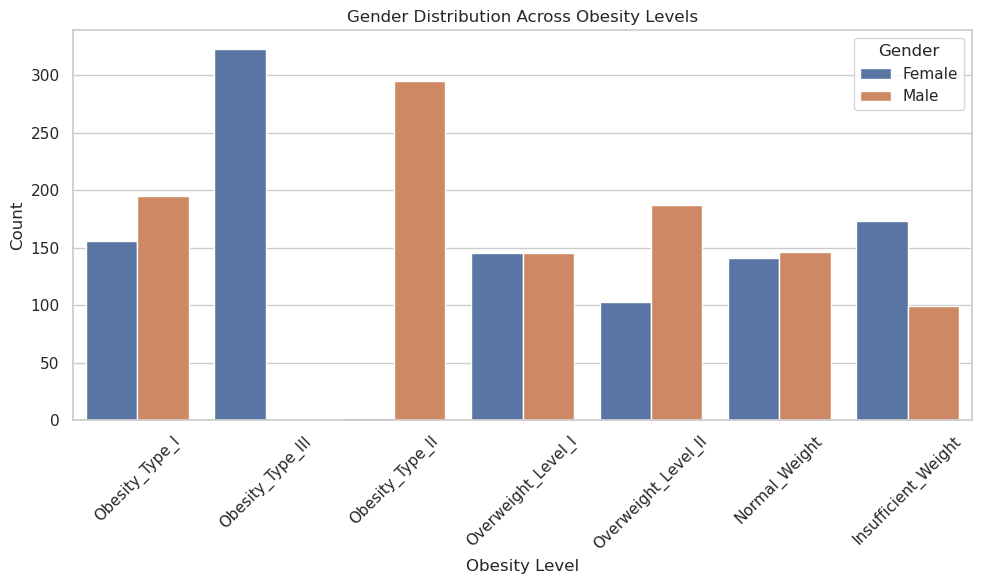

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Obesity_Level', hue='Gender', order=df['Obesity_Level'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Gender Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

##### Correlation Heatmap for Numerical Features

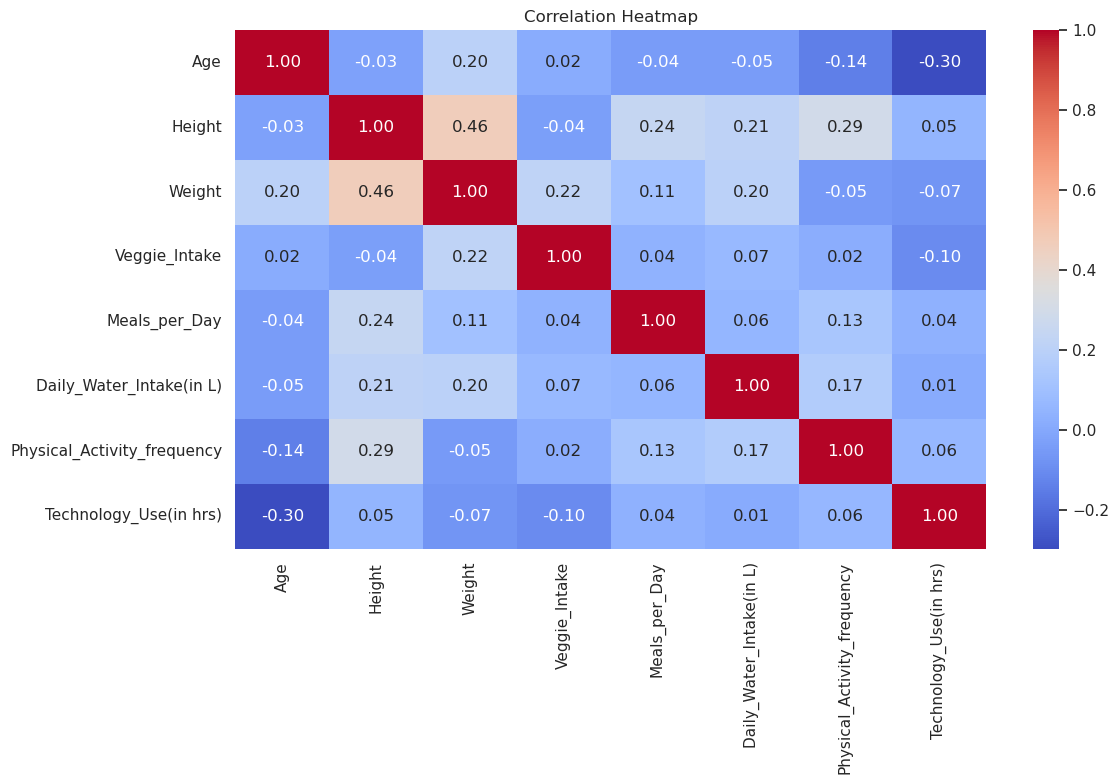

In [45]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### Comaprison of Physical Activity and Obesity Level

/tmp/ipykernel_177/4091875871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Obesity_Level', y='Physical_Activity_frequency', palette='tab20', order=df['Obesity_Level'].value_counts().index)


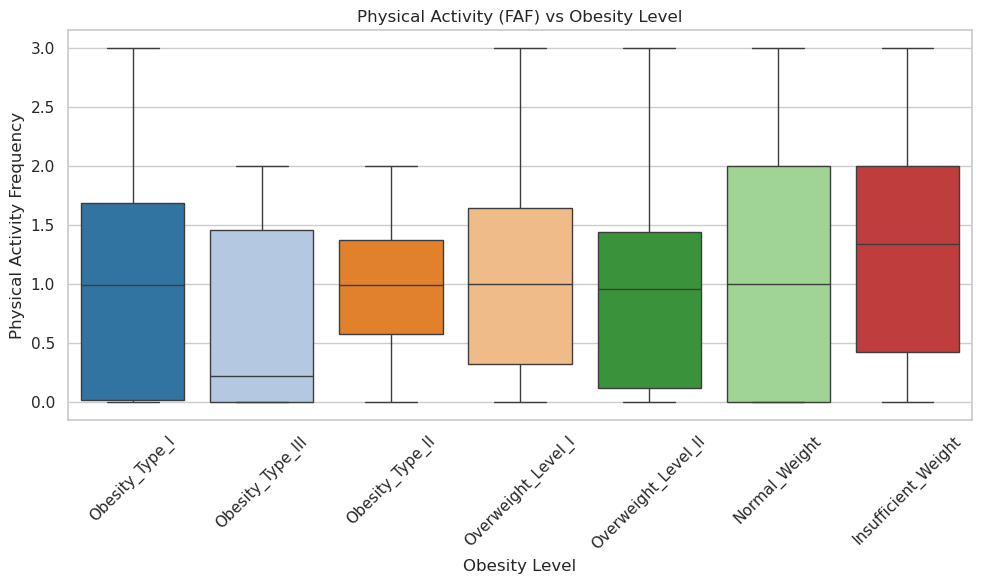

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Obesity_Level', y='Physical_Activity_frequency', palette='tab20', order=df['Obesity_Level'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Physical Activity (FAF) vs Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Physical Activity Frequency')
plt.tight_layout()
plt.show()

##### Age Distribution Across Different Obesity Levels

/tmp/ipykernel_177/1021256213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Obesity_Level', y='Age', palette='Set2', order=df['Obesity_Level'].value_counts().index)


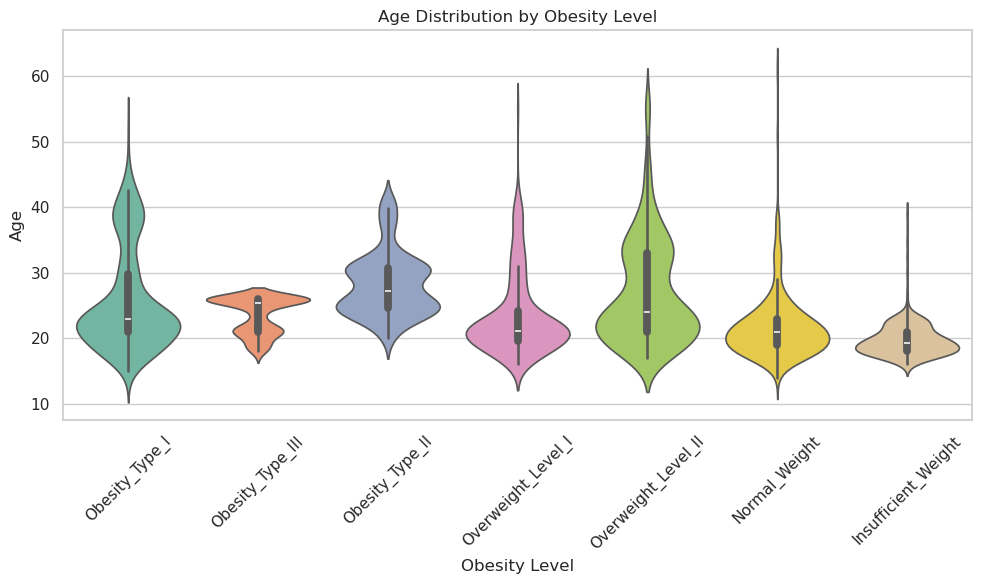

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Obesity_Level', y='Age', palette='Set2', order=df['Obesity_Level'].value_counts().index)
plt.title('Age Distribution by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Encoding for the categorical features

##### OBESITY LEVEL

In [48]:
le = LabelEncoder()
df['Obesity_Level'] = le.fit_transform(df['Obesity_Level'])

for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")


0 → Insufficient_Weight
1 → Normal_Weight
2 → Obesity_Type_I
3 → Obesity_Type_II
4 → Obesity_Type_III
5 → Overweight_Level_I
6 → Overweight_Level_II


##### GENDER


In [49]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

0 → Female
1 → Male


##### FAMILY HISTORY WITH OVERWEIGHT

In [50]:
le = LabelEncoder()
df['Family_History_with_overweight'] = le.fit_transform(df['Family_History_with_overweight'])


for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

0 → no
1 → yes


##### HIGH CALORIE FOOD CONSUMPTION

In [51]:
le = LabelEncoder()
df['High_Calorie_Food_Consumption'] = le.fit_transform(df['High_Calorie_Food_Consumption'])

# Show the mapping
for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

0 → no
1 → yes


##### SNACKING FREQUENCY

In [52]:
le = LabelEncoder()
df['Snacking_Frequency'] = le.fit_transform(df['Snacking_Frequency'])


for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

0 → Always
1 → Frequently
2 → Sometimes
3 → no


##### SMOKING HABIT

In [53]:
le = LabelEncoder()
df['Smoking_Habit'] = le.fit_transform(df['Smoking_Habit'])


for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

0 → no
1 → yes


##### CALORIE MONITERING

In [54]:
le = LabelEncoder()
df['Monitors_Calories'] = le.fit_transform(df['Monitors_Calories'])

for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

0 → no
1 → yes


##### MODE OF TRANSPORT

In [55]:
le = LabelEncoder()
df['Transport_Mode'] = le.fit_transform(df['Transport_Mode'])


for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

0 → Automobile
1 → Bike
2 → Motorbike
3 → Public_Transportation
4 → Walking


##### ALCOHOL CONSUMPTION

In [56]:
le = LabelEncoder()
df['Alcohol_Consumption'] = le.fit_transform(df['Alcohol_Consumption'])


for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

0 → Always
1 → Frequently
2 → Sometimes
3 → no


#### Defining target and features

In [57]:
X = df.drop(columns=["Obesity_Level"])
y = df["Obesity_Level"]

#### Random forest

 Accuracy: 0.9550827423167849

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.89      0.90      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423


 Confusion Matrix:
 [[54  2  0  0  0  0  0]
 [ 1 56  0  0  0  5  0]
 [ 0  0 76  2  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 50  1]
 [ 0  0  0  0  0  2 48]]


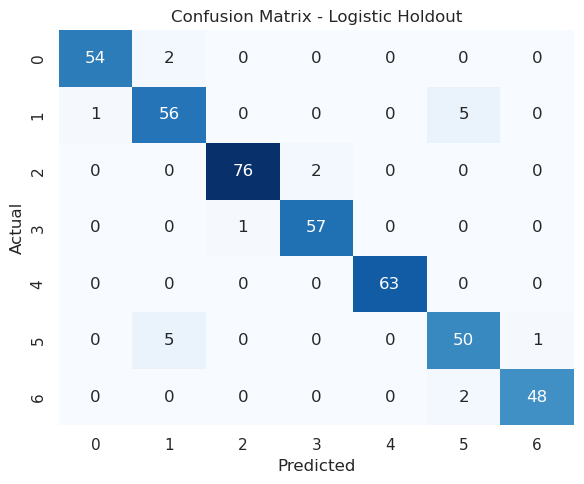

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(" Accuracy:", accuracy)
print("\n Classification Report:\n", report)
print("\n Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                )
plt.title('Confusion Matrix - Logistic Holdout')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



##### Random Forest with cross validation

In [59]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
y_pred_cv = cross_val_predict(rf_model, X, y, cv=5)


accuracy = accuracy_score(y, y_pred_cv)
report = classification_report(y, y_pred_cv)
conf_matrix = confusion_matrix(y, y_pred_cv)


print(" Cross-Validation Accuracy:", accuracy)
print("\n Cross-Validation Classification Report:\n", report)
print("\n Cross-Validation Confusion Matrix:\n", conf_matrix)

 Cross-Validation Accuracy: 0.9365229748934154

 Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       272
           1       0.74      0.94      0.83       287
           2       0.99      0.95      0.97       351
           3       0.99      0.99      0.99       297
           4       1.00      1.00      1.00       324
           5       0.93      0.85      0.89       290
           6       0.95      0.87      0.91       290

    accuracy                           0.94      2111
   macro avg       0.94      0.93      0.94      2111
weighted avg       0.94      0.94      0.94      2111


 Cross-Validation Confusion Matrix:
 [[256  16   0   0   0   0   0]
 [  2 270   0   0   0  13   2]
 [  0   9 335   3   0   1   3]
 [  0   1   2 293   1   0   0]
 [  0   1   0   0 323   0   0]
 [  0  36   0   0   0 247   7]
 [  0  31   2   0   0   4 253]]


#### Logistic Regression

 Accuracy: 0.806146572104019

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        56
           1       0.81      0.55      0.65        62
           2       0.88      0.81      0.84        78
           3       0.83      1.00      0.91        58
           4       0.97      1.00      0.98        63
           5       0.65      0.66      0.65        56
           6       0.61      0.62      0.61        50

    accuracy                           0.81       423
   macro avg       0.80      0.80      0.79       423
weighted avg       0.81      0.81      0.80       423


 Confusion Matrix:
 [[55  1  0  0  0  0  0]
 [11 34  0  0  0 12  5]
 [ 0  0 63 10  2  0  3]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  1  0  0 37 12]
 [ 0  1  8  2  0  8 31]]


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


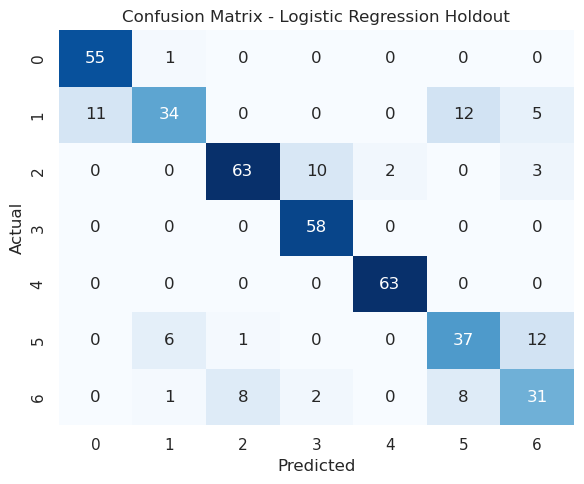

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(" Accuracy:", accuracy)
print("\n Classification Report:\n", report)
print("\n Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                )
plt.title('Confusion Matrix - Logistic Regression Holdout')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [66]:
lr_model = LogisticRegression(random_state=42, max_iter=5000)
y_pred_cv = cross_val_predict(lr_model, X, y, cv=5)


accuracy = accuracy_score(y, y_pred_cv)
report = classification_report(y, y_pred_cv)
conf_matrix = confusion_matrix(y, y_pred_cv)


print(" Cross-Validation Accuracy:", accuracy)
print("\n Cross-Validation Classification Report:\n", report)
print("\n Cross-Validation Confusion Matrix:\n", conf_matrix)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

 Cross-Validation Accuracy: 0.8247276172430128

 Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       272
           1       0.75      0.63      0.69       287
           2       0.84      0.87      0.85       351
           3       0.91      0.98      0.94       297
           4       0.99      1.00      0.99       324
           5       0.70      0.71      0.71       290
           6       0.69      0.62      0.66       290

    accuracy                           0.82      2111
   macro avg       0.82      0.82      0.82      2111
weighted avg       0.82      0.82      0.82      2111


 Cross-Validation Confusion Matrix:
 [[252  20   0   0   0   0   0]
 [ 47 182   0   0   0  44  14]
 [  0   0 305  21   1   4  20]
 [  0   0   4 291   2   0   0]
 [  0   0   0   1 323   0   0]
 [  0  28   8   0   0 207  47]
 [  0  14  46   7   0  42 181]]


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XGBoost

 Accuracy: 0.9621749408983451

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.89      0.92        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.95      0.93        56
           6       1.00      0.98      0.99        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423


 Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 4 55  0  0  0  3  0]
 [ 0  0 75  2  0  1  0]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 53  0]
 [ 0  0  0  0  0  1 49]]


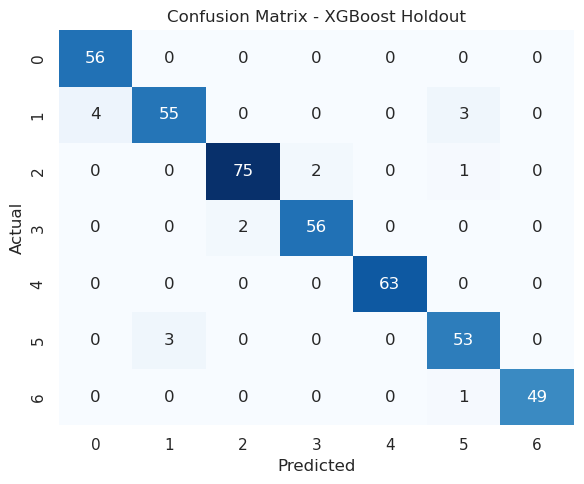

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(" Accuracy:", accuracy)
print("\n Classification Report:\n", report)
print("\n Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                )
plt.title('Confusion Matrix - XGBoost Holdout')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [63]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
y_pred_cv = cross_val_predict(xgb_model, X, y, cv=5)


accuracy = accuracy_score(y, y_pred_cv)
report = classification_report(y, y_pred_cv)
conf_matrix = confusion_matrix(y, y_pred_cv)


print(" Cross-Validation Accuracy:", accuracy)
print("\n Cross-Validation Classification Report:\n", report)
print("\n Cross-Validation Confusion Matrix:\n", conf_matrix)

 Cross-Validation Accuracy: 0.9564187588820464

 Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       272
           1       0.81      0.95      0.87       287
           2       0.99      0.99      0.99       351
           3       1.00      0.99      0.99       297
           4       1.00      1.00      1.00       324
           5       0.96      0.86      0.91       290
           6       0.98      0.93      0.96       290

    accuracy                           0.96      2111
   macro avg       0.96      0.95      0.96      2111
weighted avg       0.96      0.96      0.96      2111


 Cross-Validation Confusion Matrix:
 [[261  11   0   0   0   0   0]
 [  5 274   0   0   0   8   0]
 [  0   0 347   1   0   2   1]
 [  0   1   1 295   0   0   0]
 [  0   1   0   0 323   0   0]
 [  0  37   0   0   0 248   5]
 [  0  16   3   0   0   0 271]]
